In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

output_notebook()

cust = pd.read_csv('C:/Users/Lara/Documents/Repository/Capstone2/custodial-deaths.csv')
shoot = pd.read_csv('C:/Users/Lara/Documents/Repository/Capstone2/officer_shootings.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Lara\Miniconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure', 'show', 'source']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

In [2]:
cust.head()

,Department Name,Custody Type,Custody Type Facility,First Name,Middle Name,Last Name,Ethnicity,Sex,Age,Death Date,Manner Death,Charges Status,Summary,Unnamed: 13
0,Texas Department Of Criminal Justice,Penitentiary,Pack,A.,NaN,Gomez,Hispanic or Latino,Male,58.0,9/12/2012 0:00,Natural Causes/Illness,Convicted,NaN,NaN
1,Texas Department Of Criminal Justice,Penitentiary,Michael Unit,A.,D.,Randle,Black or African American,Male,76.0,9/29/2016 0:00,Natural Causes/Illness,Convicted,Offender Randle passed away while in attendanc...,NaN
2,Harlingen Police Dept.,Municipal Jail,0,Aaron,Omar,Cavazos,Hispanic or Latino,Male,30.0,12/14/2016 0:00,Other,Not filed at time of death,Officers responded to the decedent's residence...,NaN
3,Texas Department Of Criminal Justice,Penitentiary,Garza West,Aaron,NaN,Cramer,Anglo or White,Male,39.0,11/6/2011 0:00,Accidental injury to self,Convicted,Offender Aaron Cramer suffered a seizure and w...,NaN
4,Texas Department Of Criminal Justice,Penitentiary,Hospital Galveston,Aaron,NaN,Daffern,Anglo or White,Male,31.0,12/8/2014 0:00,Natural Causes/Illness,Convicted,"On December 2, 2014, Offender Daffern was admi...",NaN


In [3]:
shoot['state'] = shoot['state'].ffill()

In [4]:
shoot = shoot[shoot.state == 'TX']

In [5]:
shoot.tail()

,Date,NumberOfSubjects,Fatal,SubjectArmed,Notes,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,city,state
4107,8/27/2016,1,N,N,First victim was a juvenile so info protected....,U,NaN,NaN,NaN,NaN,1,A,M,Houston Police Department,Three suspects entered a jewelry store to comm...,Houston,TX
4108,8/27/2016,1,N,N,First victim was a juvenile so info protected....,B,NaN,NaN,NaN,NaN,1,A,M,Houston Police Department,Three suspects entered a jewelry store to comm...,Houston,TX
4109,8/27/2016,1,N,Y,First victim was a juvenile so info protected....,B,NaN,NaN,NaN,NaN,1,A,M,Houston Police Department,Three suspects entered a jewelry store to comm...,Houston,TX
4110,12/7/2016,1,F,Y,NaN,B,NaN,NaN,NaN,NaN,2,L;L,M;M,Houston Police Department,Officers were conducting a surveillance operat...,Houston,TX
4111,12/7/2016,1,N,Y,NaN,B,NaN,NaN,NaN,NaN,2,L;L,M;M,Houston Police Department,Officers were conducting a surveillance operat...,Houston,TX


In [6]:
cust['Department Name'].unique()

array(['Texas Department Of Criminal Justice', 'Harlingen Police Dept.',
       'Waco Police Dept.', 'Stafford Police Dept.',
       'Montgomery County Constable Precinct 4', 'Dallas Police Dept.',
       'San Antonio Police Dept.', "Gregg County Sheriff's Dept.",
       'Garland Police Dept.', 'DeSoto Police Dept.',
       "Lubbock County Sheriff's Dept.", 'South Houston Police Dept.',
       "Titus County Sheriff's Dept.", 'Lubbock Police Dept.',
       'Houston Police Dept.', 'Austin Police Dept.',
       'Mission Police Dept.', 'Mexia Police Dept.', 'Euless Police Dept.',
       "Comanche County Sheriff's Dept.", "Bexar County Sheriff's Dept.",
       "Tarrant County Sheriff's Dept.",
       'Harris County Constable Precinct 4',
       'Balcones Heights Police Dept.', "Wise County Sheriff's Dept.",
       'Baytown Police Dept.', "Bosque County Sheriff's Dept.",
       "Harris County Sheriff's Dept.", 'Grapevine Police Dept.',
       "Val Verde County Sheriff's Dept.", 'Arlington Po

In [7]:
cust['Department Name'].value_counts()

Texas Department Of Criminal Justice                 5077
Houston Police Dept.                                  234
Harris County Sheriff's Dept.                         232
San Antonio Police Dept.                              138
Dallas Police Dept.                                   120
Dallas County Sheriff's Dept.                          98
Bexar County Sheriff's Dept.                           90
Texas Department Of Public Safety                      80
Fort Worth Police Dept.                                62
Travis County Sheriff's Dept.                          47
Tarrant County Sheriff's Dept.                         43
Austin Police Dept.                                    39
El Paso County Sheriff's Dept.                         33
Montgomery County Sheriff's Dept.                      30
El Paso Police Dept.                                   29
Reeves County Sheriff's Dept.                          21
Fort Bend County Sheriff's Dept.                       19
Garland Police

In [8]:
len(cust['Department Name'].value_counts())

440

In [9]:
cust.describe()

,Age
count,7713.000000
mean,49.194347
std,14.920691
min,0.000000
25%,39.000000
50%,51.000000
75%,59.000000
max,93.000000


In [10]:
shoot.describe()

,NumberOfSubjects
count,640.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [27]:
deathtype= cust['Manner Death'].unique()

In [12]:
#create dictionary and use to designate number values to each "Manner of Death"
deathdict = {'Homicide by Law Enforcement/Correctional Staff':1, 'Natural Causes/Illness':2, 'Accidental injury to self':3, 'Suicide':4, 'Alcohol/Drug Intoxication': 5,'Homicide by Other': 6, 'Accidental injury caused by others': 7, 'Other':8}
cust['death'] = [ deathdict[x] for x in cust['Manner Death'] ]

In [13]:
cust['Ethnicity'].unique()

array(['Hispanic or Latino', 'Black or African American', 'Anglo or White',
       'Middle East', 'Asian', "Other/Don't Know",
       'Native Hawaiian/Pacific Islander', 'American Indian/Alaska Native'], dtype=object)

In [14]:
#create dictionary and use to designate number values to each "Ethnicity"
ethdict = {'Black or African American':1,'Hispanic or Latino':2, 'Anglo or White': 3, 'Middle East':4, 'Asian':5, 'Native Hawaiian/Pacific Islander':6, 'American Indian/Alaska Native':7, 'Other/Don\'t Know':8}
cust['race'] = [ ethdict[x] for x in cust['Ethnicity'] ]

In [15]:
cust['Charges Status'].unique()

array(['Convicted', 'Not filed at time of death', nan, 'Filed',
       'Probation/Parole'], dtype=object)

In [16]:
#numeric coding for Charge status
chargedict = {'Convicted':1, 'Not filed at time of death':2, 'Filed':3, 'Probation/Parole':4, nan: 5}
cust['charged'] = [chargedict[x] for x in cust['Charges Status']]

In [17]:
cust['Custody Type'].unique()

array(['Penitentiary', 'Municipal Jail', 'Police Custody (pre-booking)',
       'County Jail'], dtype=object)

In [18]:
#numeric coding for Custody type
custodydict = {'Penitentiary':1, 'Municipal Jail':2, 'Police Custody (pre-booking)':3, 'County Jail':4}
cust['custype'] = [custodydict[x] for x in cust['Custody Type']]

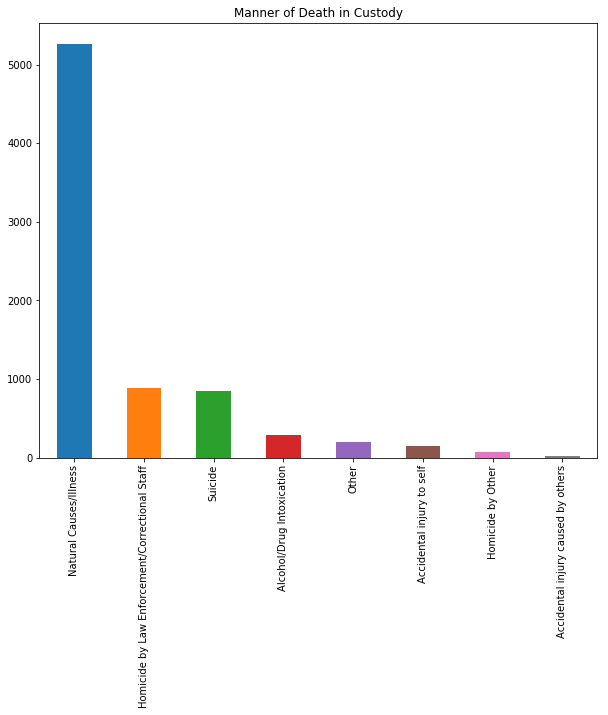

In [38]:
cust['Manner Death'].value_counts().plot(kind ='bar',figsize=(10,8), title = 'Manner of Death in Custody')

In [58]:
counts = cust['Manner Death'].value_counts()

source = ColumnDataSource(data=dict(deathtype=deathtype, counts=counts))

p = figure(x_range=deathtype, plot_height=500, plot_width=1200, title="Manner of Death in Custody",
           toolbar_location=None, tools="")

p.vbar(x='deathtype', top='counts', width=0.5, color='color', legend="deathtype", source=source, 
       line_color='white', fill_color=factor_cmap('deathtype', palette=Spectral6, factors=deathtype))

factor_cmap('deathtype', palette=Spectral6, factors=deathtype)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 6000
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

C:\Users\Lara\Miniconda3\lib\site-packages\bokeh\models\mappers.py:82: UserWarning: Palette length does not match number of factors. ['Homicide by Other' 'Accidental injury caused by others'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [22]:
cust.head()

,Department Name,Custody Type,Custody Type Facility,First Name,Middle Name,Last Name,Ethnicity,Sex,Age,Death Date,Manner Death,Charges Status,Summary,Unnamed: 13,death,race,charged,custype
0,Texas Department Of Criminal Justice,Penitentiary,Pack,A.,NaN,Gomez,Hispanic or Latino,Male,58.0,9/12/2012 0:00,Natural Causes/Illness,Convicted,NaN,NaN,2,2,1,1
1,Texas Department Of Criminal Justice,Penitentiary,Michael Unit,A.,D.,Randle,Black or African American,Male,76.0,9/29/2016 0:00,Natural Causes/Illness,Convicted,Offender Randle passed away while in attendanc...,NaN,2,1,1,1
2,Harlingen Police Dept.,Municipal Jail,0,Aaron,Omar,Cavazos,Hispanic or Latino,Male,30.0,12/14/2016 0:00,Other,Not filed at time of death,Officers responded to the decedent's residence...,NaN,8,2,2,2
3,Texas Department Of Criminal Justice,Penitentiary,Garza West,Aaron,NaN,Cramer,Anglo or White,Male,39.0,11/6/2011 0:00,Accidental injury to self,Convicted,Offender Aaron Cramer suffered a seizure and w...,NaN,3,3,1,1
4,Texas Department Of Criminal Justice,Penitentiary,Hospital Galveston,Aaron,NaN,Daffern,Anglo or White,Male,31.0,12/8/2014 0:00,Natural Causes/Illness,Convicted,"On December 2, 2014, Offender Daffern was admi...",NaN,2,3,1,1


In [23]:
#custna = cust[(cust['Custody Type'].dropna()) & (cust['Ethnicity'].dropna()) & (cust['Manner Death'].dropna()) & (cust['Charges Status'].dropna())]
custody= cust['Custody Type'].dropna()
race = cust['Ethnicity'].dropna()
death = cust['Manner Death'].dropna()
charge = cust['Charges Status'].dropna()

dfcharge = pd.get_dummies(custody)
dfrace =pd.get_dummies(race)
dfdeath = pd.get_dummies(death)
dfcharge = pd.get_dummies(charge)

In [24]:
dfcharge.head()

,Convicted,Filed,Not filed at time of death,Probation/Parole
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [25]:
dfdeath.corrwith(dfrace)

Accidental injury caused by others               NaN
Accidental injury to self                        NaN
Alcohol/Drug Intoxication                        NaN
American Indian/Alaska Native                    NaN
Anglo or White                                   NaN
Asian                                            NaN
Black or African American                        NaN
Hispanic or Latino                               NaN
Homicide by Law Enforcement/Correctional Staff   NaN
Homicide by Other                                NaN
Middle East                                      NaN
Native Hawaiian/Pacific Islander                 NaN
Natural Causes/Illness                           NaN
Other                                            NaN
Other/Don't Know                                 NaN
Suicide                                          NaN
dtype: float64